# RESULTADOS
## Filtrado para biceps en contrafuerza

Frecuencia de muestreo: 1000.0 Hz


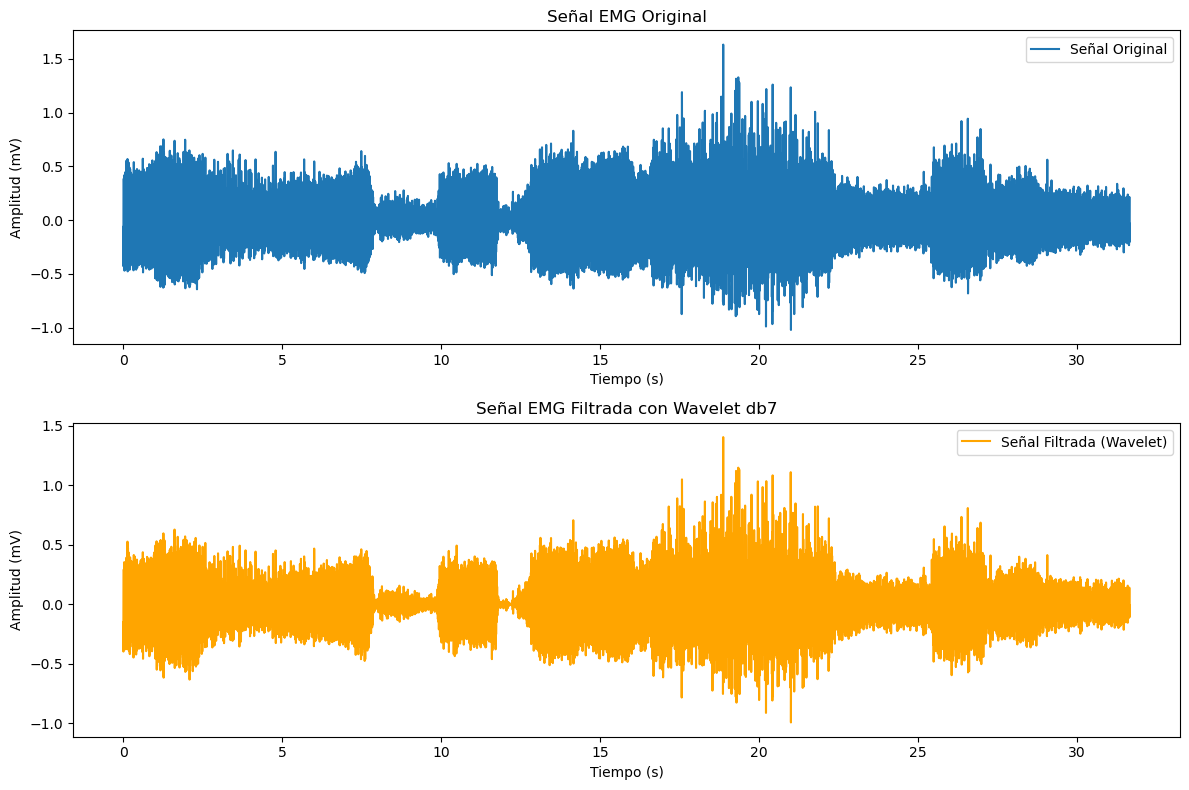

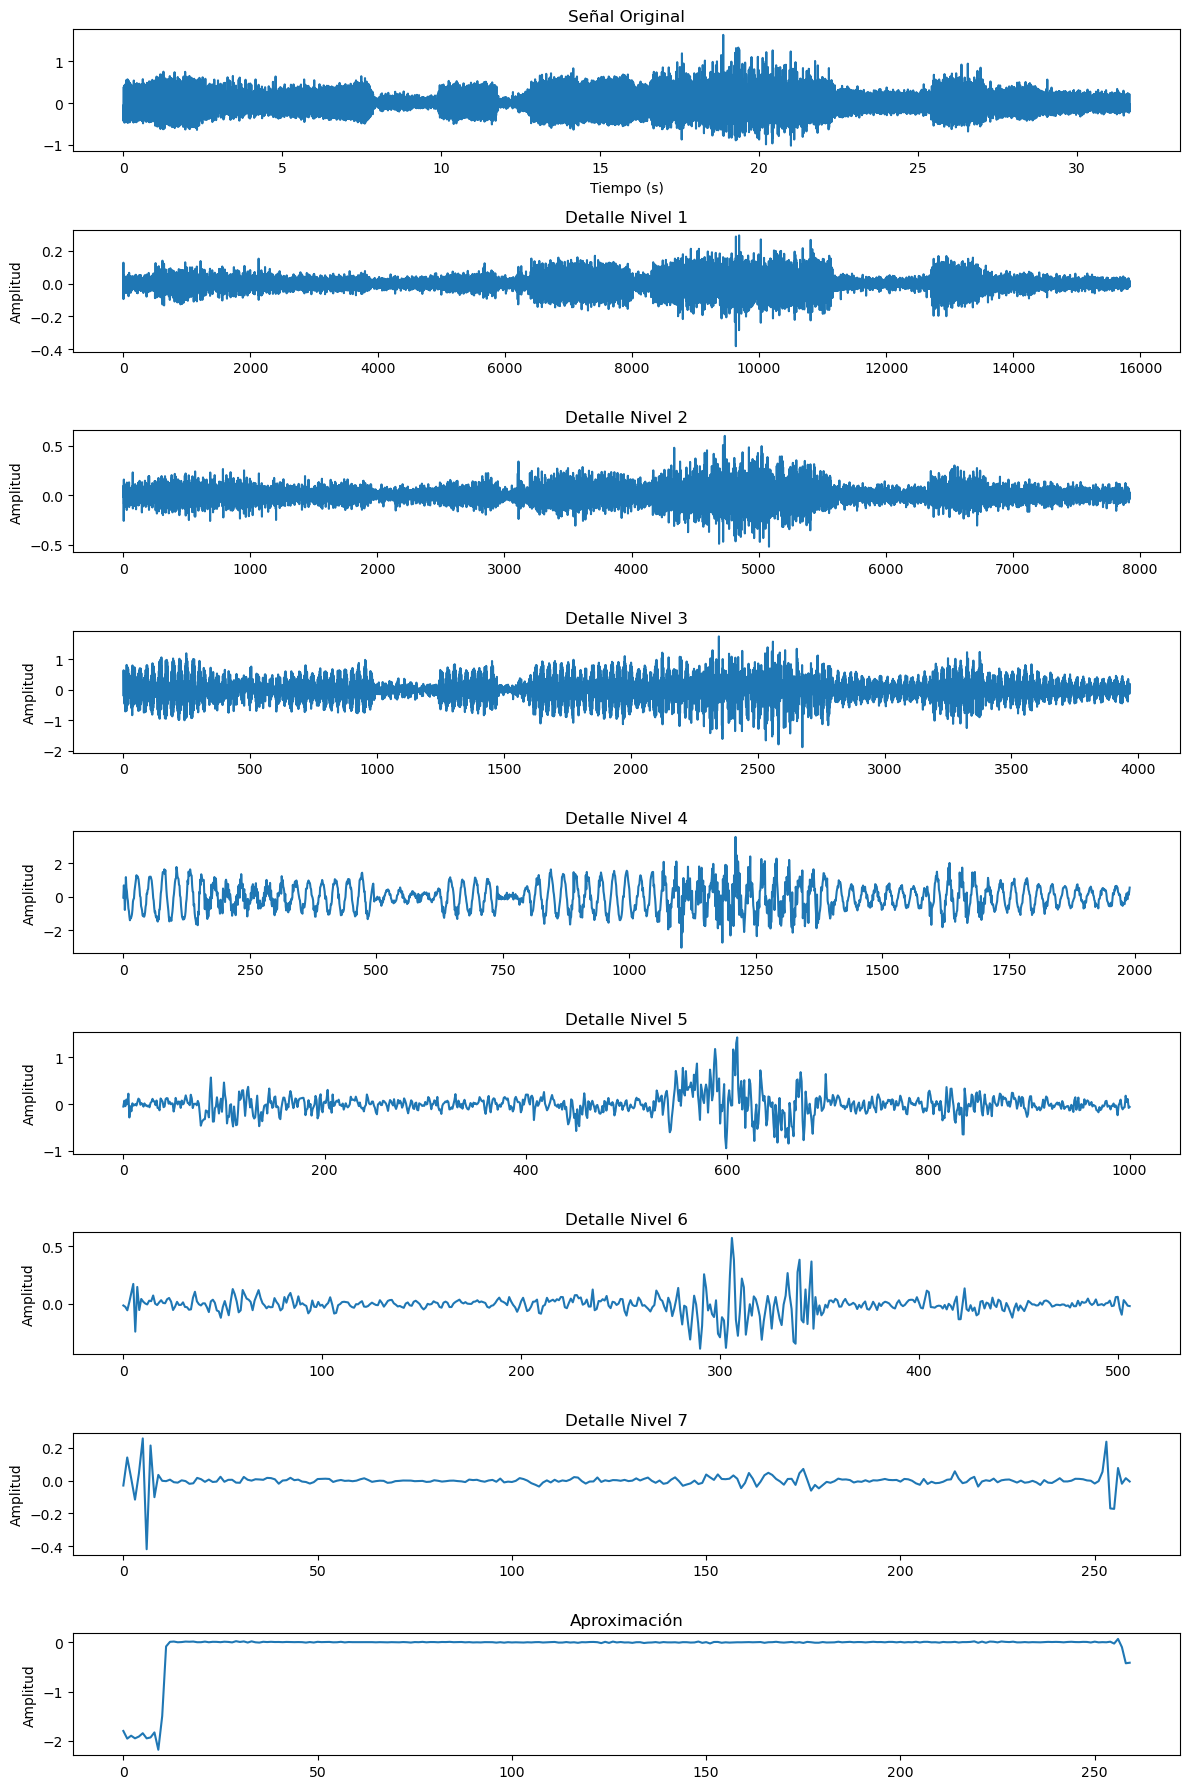

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import re

# 1. Cargar el archivo de señal EMG
ruta_archivo = "C:/Users/DAVID/Desktop/INTRO A SEÑALES/lab 7/biceps contrafuerza 1 (1).txt"

# Leo el archivo y extraer la frecuencia de muestreo
with open(ruta_archivo, "r") as f:
    lineas = f.readlines()
    raw_data = lineas[1]
    x = re.findall(r"[0-9]{3,4}", raw_data)[0]
    Fs = float(x)
    Ts = 1/Fs

print(f"Frecuencia de muestreo: {Fs} Hz")

# Leer los datos, saltando las primeras 3 filas
datos = np.genfromtxt(ruta_archivo, delimiter="\t", skip_header=3)

y = datos[:, -2]
bits = 10
volt_range = 3.28 
y = (y * volt_range/(2**bits - 1))  
y = y - np.mean(y) 

t = np.arange(0, len(y)*Ts, Ts)

# 2. Descomposición Wavelet Daubechies
wavelet = 'db7'  
niveles = 7     

# Descomposición
coeffs = pywt.wavedec(y, wavelet, level=niveles)

# 3. Filtrado
umbral = 0.1  # Ajusta según el ruido de tu señal
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstrucción de la señal filtrada
y_denoised = pywt.waverec(coeffs_umbral, wavelet)

# 4. Ploteo de resultados

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Señal Original')
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')

plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t[:len(y_denoised)], y_denoised, label='Señal Filtrada (Wavelet)', color='orange')
plt.title(f'Señal EMG Filtrada con Wavelet {wavelet}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')

plt.legend()
plt.tight_layout()
plt.show()

# 5. Ploteo de coeficientes de detalle y aproximación
plt.figure(figsize=(12, 2*(niveles+2)))
plt.subplot(niveles+2, 1, 1)
plt.plot(t, y)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')

for i in range(1, niveles+1):
    plt.subplot(niveles+2, 1, i+1)
    plt.plot(coeffs[niveles-i+1])
    plt.title(f'Detalle Nivel {i}')
    plt.ylabel('Amplitud')

plt.subplot(niveles+2, 1, niveles+2)
plt.plot(coeffs[0])
plt.title('Aproximación')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

## Filtrado para movimiento de cara

Frecuencia de muestreo: 1000.0 Hz


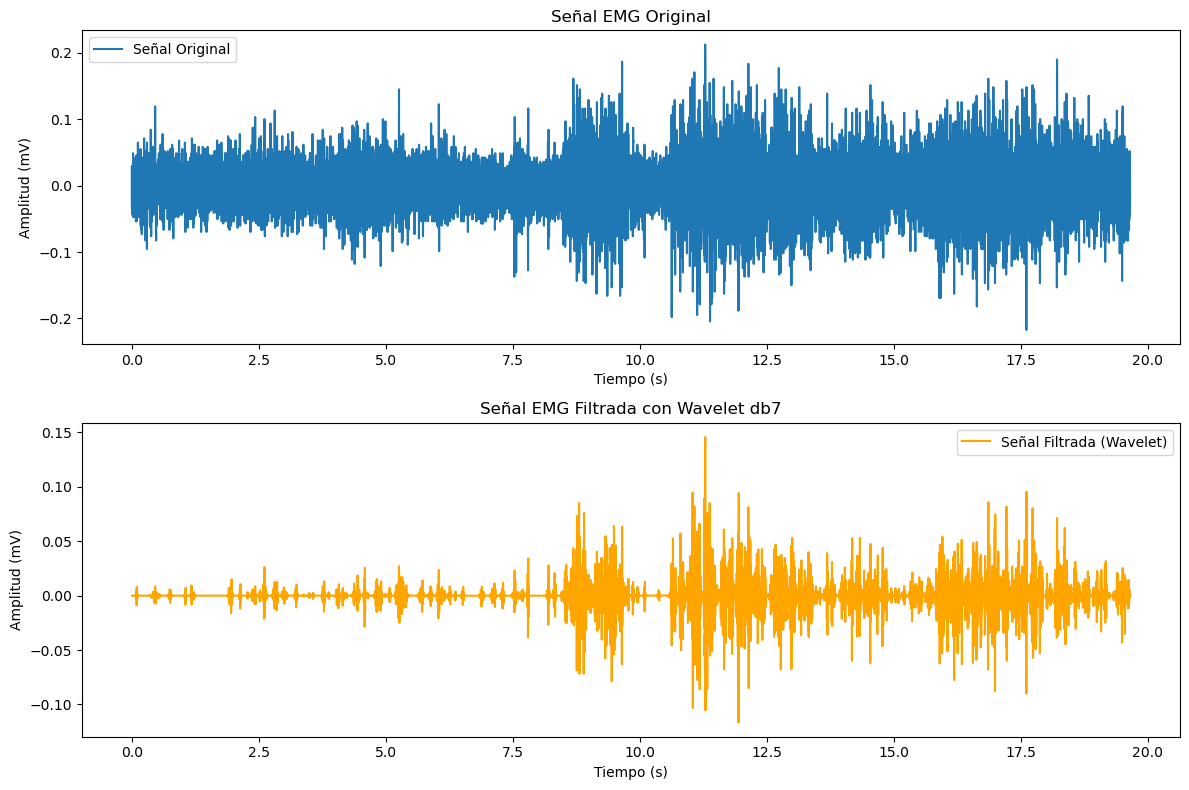

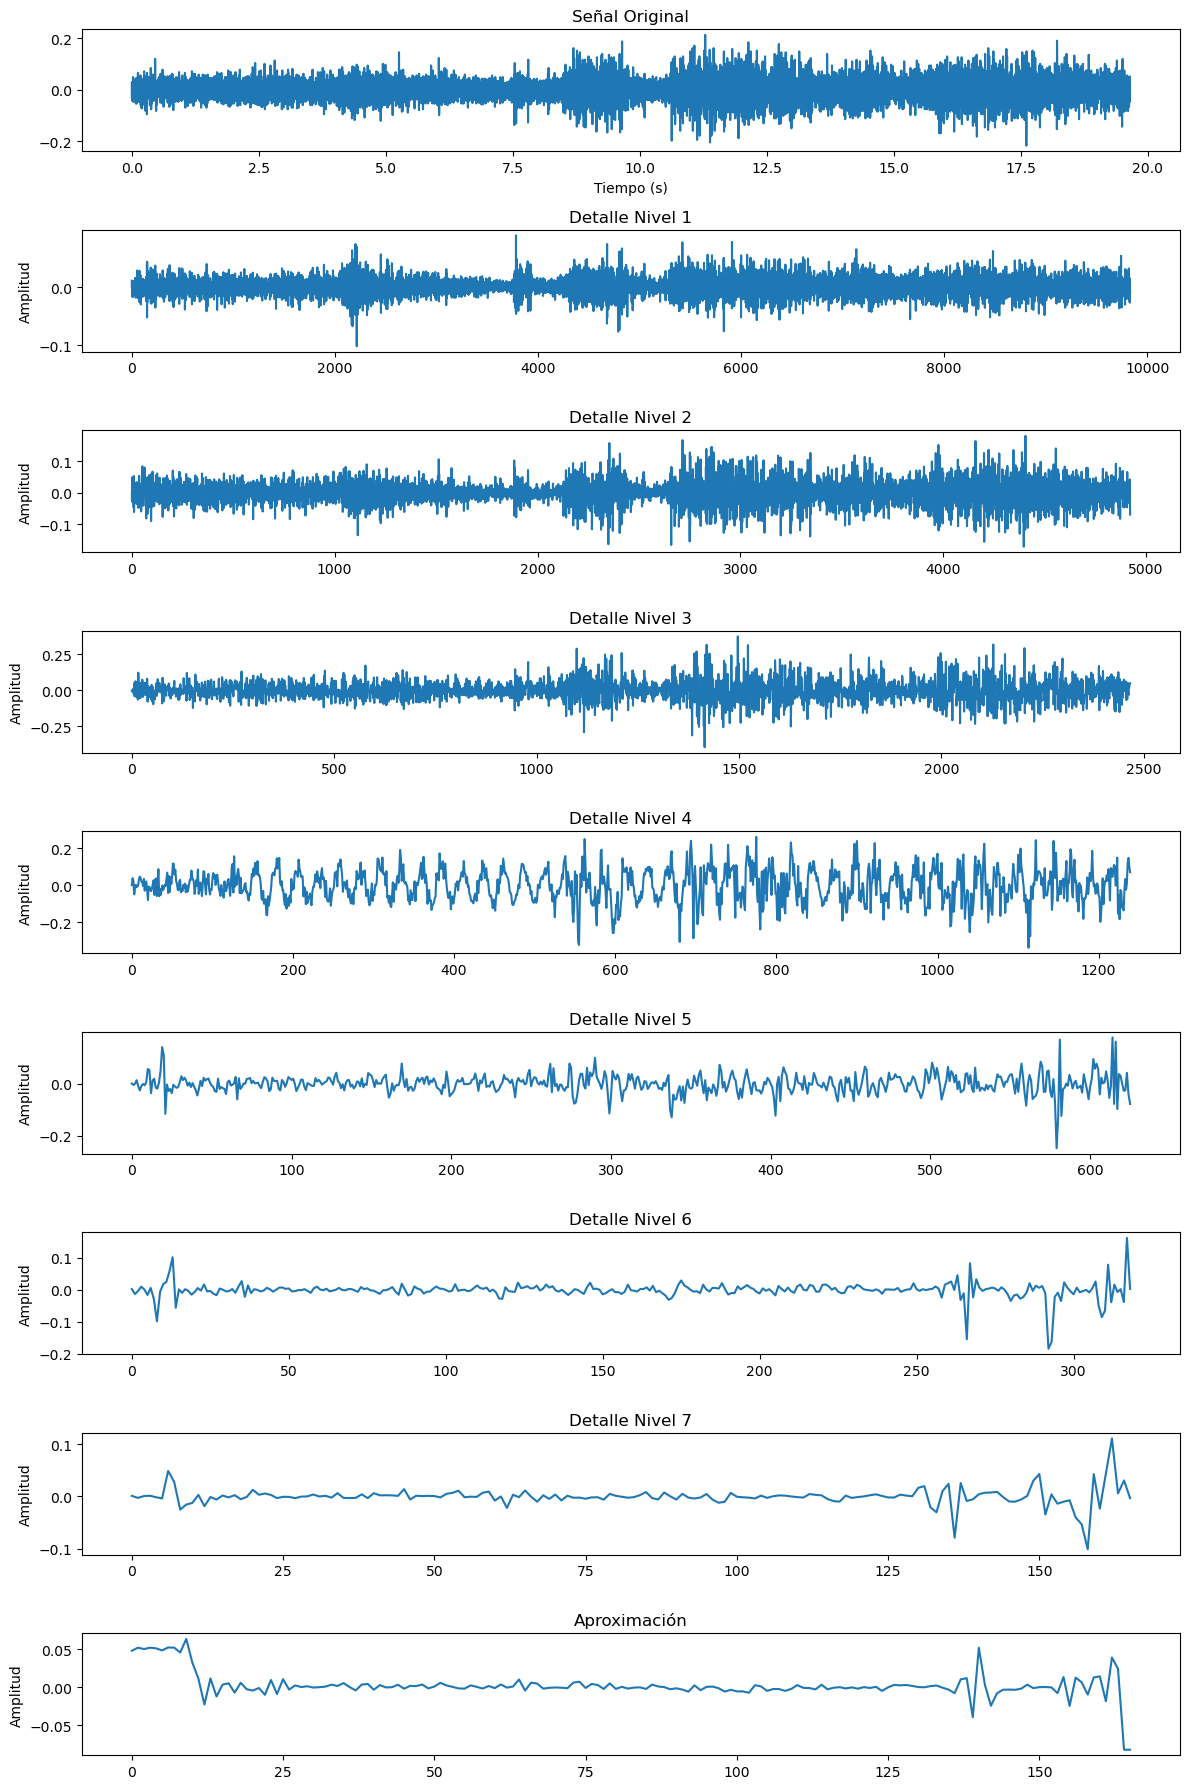

In [8]:
ruta_archivo = "C:/Users/DAVID/Desktop/INTRO A SEÑALES/lab 7/cara mov 1.txt"

# Leo el archivo y extraer la frecuencia de muestreo
with open(ruta_archivo, "r") as f:
    lineas = f.readlines()
    raw_data = lineas[1]
    x = re.findall(r"[0-9]{3,4}", raw_data)[0]
    Fs = float(x)
    Ts = 1/Fs

print(f"Frecuencia de muestreo: {Fs} Hz")

# Leer los datos, saltando las primeras 3 filas
datos = np.genfromtxt(ruta_archivo, delimiter="\t", skip_header=3)

y = datos[:, -2]
bits = 10
volt_range = 3.28  # mV
y = (y * volt_range/(2**bits - 1))  # convertir los bits a mV
y = y - np.mean(y)  # centrar la señal

t = np.arange(0, len(y)*Ts, Ts)

# 1. Descomposición Wavelet Daubechies
wavelet = 'db7' 
niveles = 7      

# Descomposición
coeffs = pywt.wavedec(y, wavelet, level=niveles)

# 2. Filtrado
umbral = 0.1  
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstrucción de la señal filtrada
y_denoised = pywt.waverec(coeffs_umbral, wavelet)

# 3. Ploteo de resultados

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, y, label='Señal Original')
plt.title('Señal EMG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')

plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t[:len(y_denoised)], y_denoised, label='Señal Filtrada (Wavelet)', color='orange')
plt.title(f'Señal EMG Filtrada con Wavelet {wavelet}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')

plt.legend()
plt.tight_layout()
plt.show()

# 4. Ploteo de coeficientes de detalle y aproximación
plt.figure(figsize=(12, 2*(niveles+2)))
plt.subplot(niveles+2, 1, 1)
plt.plot(t, y)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')

for i in range(1, niveles+1):
    plt.subplot(niveles+2, 1, i+1)
    plt.plot(coeffs[niveles-i+1])
    plt.title(f'Detalle Nivel {i}')
    plt.ylabel('Amplitud')

plt.subplot(niveles+2, 1, niveles+2)
plt.plot(coeffs[0])
plt.title('Aproximación')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()